<a href="https://colab.research.google.com/github/Amruthakap3/AML/blob/main/simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression on Forest fires data set


In [88]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sbn

# Import Forest fires data set from github into a dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Amruthakap3/AML/main/forestfires.csv')
#Discribe the data frame
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


# **Plot the data frame**

Lets plot the data frame to understand the data, we will be ploting area against other features like temp, rain, winad and RH

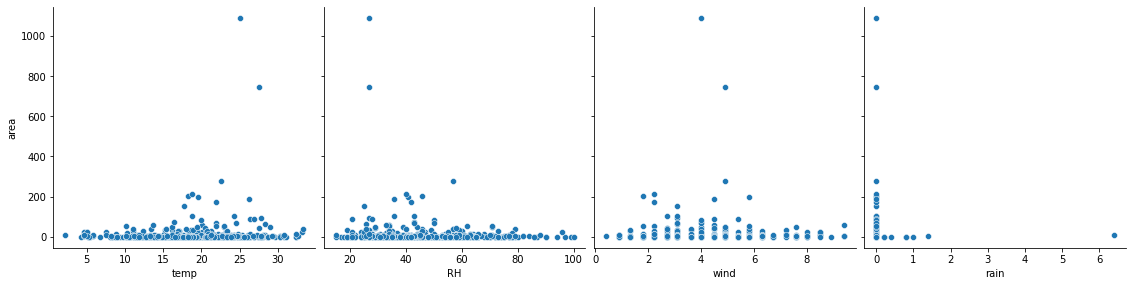

In [89]:
# Here the target variable is area
sbn.pairplot(df, x_vars= ['temp','RH','wind','rain'],y_vars='area', height=4, aspect=1, kind='scatter')
plt.show()

# **Data distribution plot**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


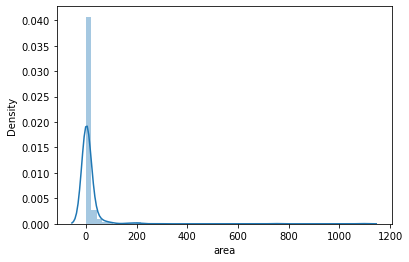

In [90]:
sbn.distplot(df['area'], kde=True, hist=True)

# **Normalize the data and Plot**

The above plot shows the uneven distribution of the data, we could use log transformation to reduce or remove the skewness of our original data. Log transformation is a data transformation method in which it replaces each variable x with a log(x)

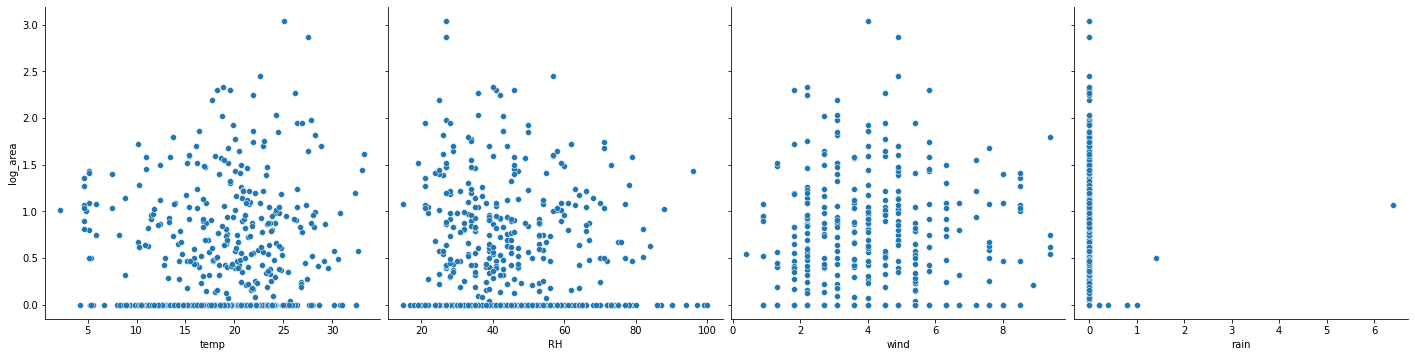

In [91]:
import numpy as np

temp_area = pd.DataFrame(df['area'])

df['log_area'] = np.log10(temp_area+1)

#df['log_area']

sbn.pairplot(df, x_vars= ['temp','RH','wind','rain'],y_vars='log_area', height=5, aspect=1, kind='scatter')

plt.show()


# **Linear Regression** 

In [92]:
from sklearn import linear_model
#define the modeles for each feature
lm_temp = linear_model.LinearRegression()
lm_rh = linear_model.LinearRegression()
lm_wind = linear_model.LinearRegression()
lm_rain = linear_model.LinearRegression()

#define the data 
x_temp = df['temp'].values.reshape(-1,1)
x_rh = df['RH'].values.reshape(-1,1)
x_wind = df['wind'].values.reshape(-1,1)
x_rain = df['rain'].values.reshape(-1,1)

#Remove outliers from rain data
rain_quantile = df['rain'].quantile(0.99)
x_rain_without_outliers = df[df['rain'] < rain_quantile]
x_rain = x_rain_without_outliers['rain'].values.reshape(-1,1)
y_rain = x_rain_without_outliers['log_area'].values.reshape(-1,1)

#Except rain all other features use same y value
y = df['log_area'].values.reshape(-1,1)

# Fit the model using .fit() method
lm_temp.fit(x_temp, y)
lm_rh.fit(x_rh, y)
lm_wind.fit(x_wind, y)
lm_rain.fit(x_rain, y_rain)

# intercept and slope values
temp_t0, temp_t1 = lm_temp.intercept_[0], lm_temp.coef_[0][0]
rh_t0, rh_t1 = lm_rh.intercept_[0], lm_rh.coef_[0][0]
wind_t0, wind_t1 = lm_wind.intercept_[0], lm_wind.coef_[0][0]
rain_t0, rain_t1 = lm_rain.intercept_[0], lm_rain.coef_[0][0]


print("Model area vs temp intercept:  "+ str(temp_t0) + "  slope: "+str(temp_t1))
print("Model area vs RH intercept:    "+ str(rh_t0)   + "  slope: "+str(rh_t1))
print("Model area vs wind intercept:  "+ str(wind_t0) + " slope: "+str(wind_t1))
print("Model area vs rain intercept:  "+ str(rain_t0) + "  slope: "+str(rain_t1))


Model area vs temp intercept:  0.3768402195781929  slope: 0.0055943246406643336
Model area vs RH intercept:    0.5709689642135138  slope: -0.0019972950532002125
Model area vs wind intercept:  0.39130227060318623 slope: 0.022702621810896988
Model area vs rain intercept:  0.4870043475962641  slope: -2.4350217379813124


# **Plot the Linear Regression results**

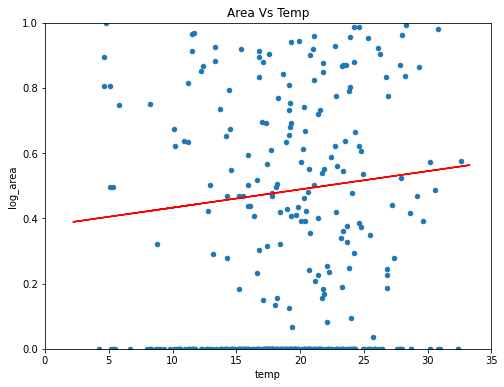

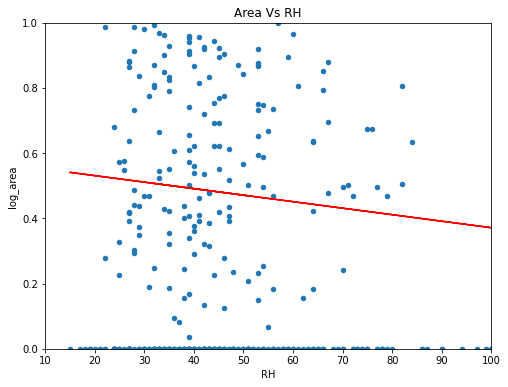

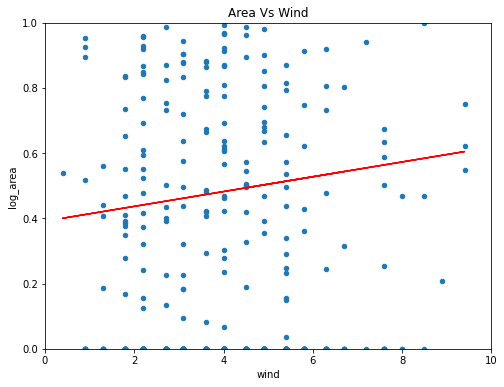

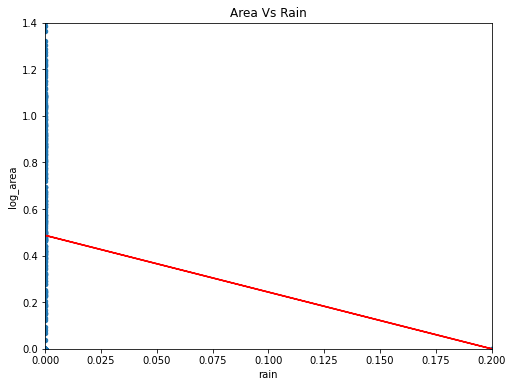

In [94]:
df.plot(kind='scatter', x='temp', y='log_area', figsize=(8, 6))

plt.axis([0, 35, 0, 1])
plt.title('Area Vs Temp')
plt.plot(x_temp, temp_t0 + temp_t1*x_temp, "r")
plt.show()

df.plot(kind='scatter', x='RH', y='log_area', figsize=(8, 6))

plt.axis([10, 100, 0, 1])
plt.title('Area Vs RH')
plt.plot(x_rh, rh_t0 + rh_t1*x_rh, "r")
plt.show()

df.plot(kind='scatter', x='wind', y='log_area', figsize=(8, 6))

plt.axis([0,10, 0,1])
plt.title('Area Vs Wind')
plt.plot(x_wind, wind_t0 + wind_t1*x_wind, "r")
plt.show()

df.plot(kind='scatter', x='rain', y='log_area', figsize=(8, 6))

plt.axis([0.000, 0.200, 0.0, 1.4])
plt.title('Area Vs Rain')
plt.plot(x_rain, rain_t0 + rain_t1*x_rain, "r")
plt.show()

# **Liner regression  using 80-20 hold out**

In [97]:
# Let's experiment again, but this time split the data into training and testing sets
# random_state control the shuffling of input data


#create result set for each feature to avoid issues with data split and shuffle
y_temp = y
y_rh = y
y_wind = y
y_rain = y_rain


#split the data into training and testing sets for each feature
from sklearn.model_selection import train_test_split

#temp train and test set
temp_x_train, temp_x_test, temp_y_train, temp_y_test = train_test_split(x_temp, y_temp, train_size = 0.8, 
                                                          test_size = 0.2, 
                                                          random_state = 100)
#RH train and test set
rh_x_train, rh_x_test, rh_y_train, rh_y_test = train_test_split(x_rh, y_rh, train_size = 0.8, 
                                                          test_size = 0.2, 
                                                          random_state = 100)
#wind train and test set
wind_x_train, wind_x_test, wind_y_train, wind_y_test = train_test_split(x_wind, y_wind, train_size = 0.8, 
                                                          test_size = 0.2, 
                                                          random_state = 100)
#rain train and test set
rain_x_train, rain_x_test, rain_y_train, rain_y_test = train_test_split(x_rain, y_rain, train_size = 0.8, 
                                                          test_size = 0.2, 
                                                          random_state = 100)

print("Temp Training data shape : "+str(temp_x_train.shape) +"   Test data shape: "+str(temp_x_test.shape))
print("RH Training data shape :   "+str(rh_x_train.shape) +"   Test data shape: "+str(rh_x_test.shape))
print("Wind Training data shape : "+str(wind_x_train.shape) +"   Test data shape: "+str(wind_x_test.shape))
print("Rain Training data shape : "+str(rain_x_train.shape) +"   Test data shape: "+str(rain_x_test.shape))

Temp Training data shape : (413, 1)   Test data shape: (104, 1)
RH Training data shape :   (413, 1)   Test data shape: (104, 1)
Wind Training data shape : (413, 1)   Test data shape: (104, 1)
Rain Training data shape : (408, 1)   Test data shape: (103, 1)


In [98]:
#fit the model
lm_temp.fit(temp_x_train, temp_y_train)
lm_rh.fit(rh_x_train, rh_y_train)
lm_wind.fit(wind_x_train, wind_y_train)
lm_rain.fit(rain_x_train, rain_y_train)

# intercept and slope values
temp_t0, temp_t1 = lm_temp.intercept_[0], lm_temp.coef_[0][0]
rh_t0, rh_t1 = lm_rh.intercept_[0], lm_rh.coef_[0][0]
wind_t0, wind_t1 = lm_wind.intercept_[0], lm_wind.coef_[0][0]
rain_t0, rain_t1 = lm_rain.intercept_[0], lm_rain.coef_[0][0]

print("Model area vs temp intercept:  "+ str(temp_t0) + "   slope: "+str(temp_t1))
print("Model area vs RH intercept:    "+ str(rh_t0) + "   slope: "+str(rh_t1))
print("Model area vs wind intercept:  "+ str(wind_t0) + "   slope: "+str(wind_t1))
print("Model area vs rain intercept:  "+ str(rain_t0) + "  slope: "+str(rain_t1))

Model area vs temp intercept:  0.3657533995613518   slope: 0.006526340518771833
Model area vs RH intercept:    0.5682676985101484   slope: -0.0018198158691746106
Model area vs wind intercept:  0.3971696198268752   slope: 0.022558916067612837
Model area vs rain intercept:  0.46794819139674965  slope: 0.0


In [99]:
# Let's make predictions on the data and evaluate the model using the R² and MSE values
'''
R2 is a statistic that will give some information about the goodness of fit of a model. 
In regression, the R2 coefficient of determination is a statistical measure of how well 
the regression predictions approximate the real data points. An R2 of 1 indicates that 
the regression predictions perfectly fit the data.
'''
from sklearn.metrics import r2_score, mean_squared_error

# train the model using the training set
y_train_temp_pred = lm_temp.predict(temp_x_train)
y_train_rh_pred = lm_rh.predict(rh_x_train)
y_train_wind_pred = lm_wind.predict(wind_x_train)
y_train_rain_pred = lm_rain.predict(rain_x_train)

# make predictions using the testing set
y_test_temp_pred = lm_temp.predict(temp_x_test)
y_test_rh_pred = lm_rh.predict(rh_x_test)
y_test_wind_pred = lm_wind.predict(wind_x_test)
y_test_rain_pred = lm_rain.predict(rain_x_test)



#R2 score and Mean squared error
print('Temp R2 score:',            r2_score(temp_y_test, y_test_temp_pred))
print('Temp MSE:', mean_squared_error(temp_y_test, y_test_temp_pred))
print('-------------------------------------------------------------------')
print('RH R2 score:',            r2_score(rh_y_test, y_test_rh_pred))
print('RH MSE:', mean_squared_error(rh_y_test, y_test_rh_pred))
print('-------------------------------------------------------------------')
print('Wind R2 score:',            r2_score(wind_y_test, y_test_wind_pred))
print('Wind MSE:', mean_squared_error(wind_y_test, y_test_wind_pred))
print('-------------------------------------------------------------------')
print('Rain R2 score:',            r2_score(rain_y_test, y_test_rain_pred))
print('Rain MSE:', mean_squared_error(rain_y_test, y_test_rain_pred))




Temp R2 score: -0.004574997224866095
Temp MSE: 0.33721489144635675
-------------------------------------------------------------------
RH R2 score: 0.002807391126103842
RH MSE: 0.33473677752428593
-------------------------------------------------------------------
Wind R2 score: 0.0023451377048031574
Wind MSE: 0.33489194636455694
-------------------------------------------------------------------
Rain R2 score: -0.016903279698367468
Rain MSE: 0.4355198452101953


# Plot the Linear Regression results for 80-20 hold out

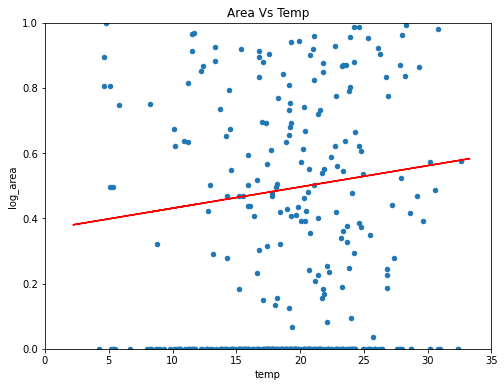

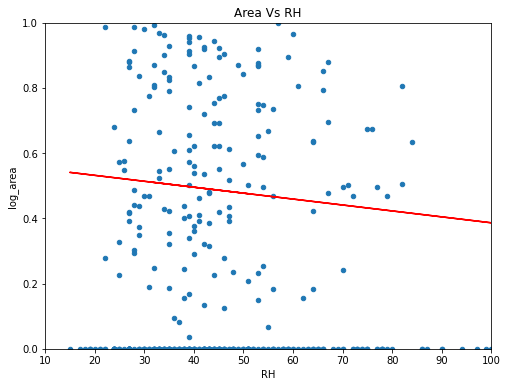

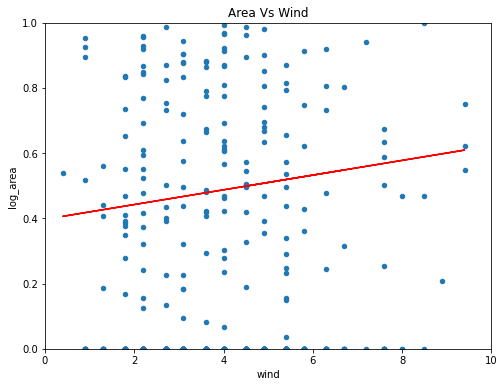

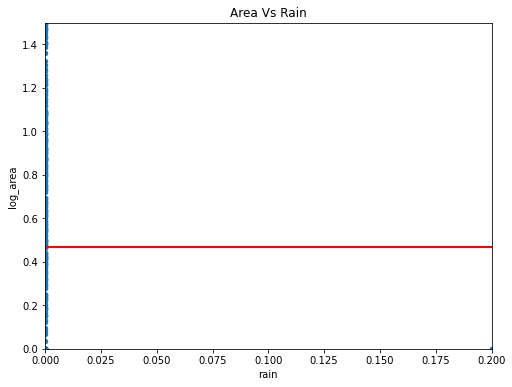

In [100]:
df.plot(kind='scatter', x='temp', y='log_area', figsize=(8, 6))

plt.axis([0, 35, 0, 1])
plt.title('Area Vs Temp')
plt.plot(x_temp, temp_t0 + temp_t1*x_temp, "r")
plt.show()

df.plot(kind='scatter', x='RH', y='log_area', figsize=(8, 6))

plt.axis([10, 100, 0, 1])
plt.title('Area Vs RH')
plt.plot(x_rh, rh_t0 + rh_t1*x_rh, "r")
plt.show()

df.plot(kind='scatter', x='wind', y='log_area', figsize=(8, 6))

plt.axis([0, 10, 0, 1])
plt.title('Area Vs Wind')
plt.plot(x_wind, wind_t0 + wind_t1*x_wind, "r")
plt.show()

df.plot(kind='scatter', x='rain', y='log_area', figsize=(8, 6))

plt.axis([0.0, 0.2, 0, 1.5])
plt.title('Area Vs Rain')
plt.plot(x_rain, rain_t0 + rain_t1*x_rain, "r")
plt.show()

# Summary

The R-squared is a statistical measure of fit that indicates how much variation of dependent variable is explained by independent variable(s) in a regression model and the MSE assesses the average squared difference betweet observed and predicted value. Here,we see that when  relative humidity was heigher, the occurence of fires was low and also the occurence of rain too reduced the fires.
(the model was not able to predict the relationship between rain and fire size properly.).In genaral the graphs obtained are very scattered and the linear regression is not appropiate for this perticular data set.






Feature |R2 Score | MSE Score
:-------------------|:---------------:|--------------------:
Temp     | -0.004574997224866095  | 0.33721489144635675
RH|0.002807391126103842|0.33473677752428593
Wind|0.0023451377048031574|0.33489194636455694
Rain|-0.016903279698367468|0.4355198452101953